<a href="https://colab.research.google.com/github/HungPham2002/mnist-classification-using-torch-and-keras-framework/blob/main/MNIST_Classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import neccessary libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Load Data

Dataset contains 60000 training set and 10000 test set. Then split the dataset into 2 part: 50000 to train and 10000 to validation set.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(50000, 28, 28)


Input data of a CNN is a 4-dimensional tensor (N,W,H,D). W = H = 28 because it's a grayscale image, D = 1, N is the number of images for each training. Because of Image size (N,28,28), we need to reshape to (N * 28 * 28 * 1) to meet keras's size requirements

# Data is reshaped to meet keras's requirements

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One hot encoding label Y. Eg: number 5 into a vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Original label ', y_train[0])
print('Label after encoding ',Y_train[0])

Original label  5
Label after encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Compile model

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Train model

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 23s 5ms/step - loss: 0.2836 - accuracy: 0.9227 - val_loss: 0.1040 - val_accuracy: 0.9697
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0626 - accuracy: 0.9822 - val_loss: 0.0555 - val_accuracy: 0.9844
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0398 - accuracy: 0.9888 - val_loss: 0.0458 - val_accuracy: 0.9871
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0428 - val_accuracy: 0.9878
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0407 - val_accuracy: 0.9878
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0129 - accuracy: 0.9964 - val_loss: 0.0389 - val_accuracy: 0.9888
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0401 - val_accuracy

# Plot loss & accuracy

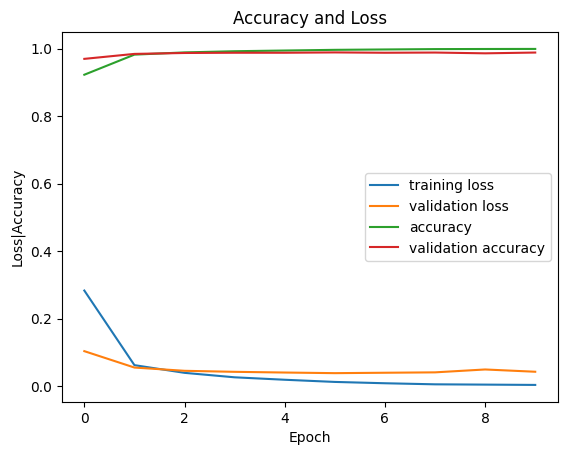

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

# Test set evaluation

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.038889821618795395, 0.988099992275238]


# Image prediction

1/1 [==============================] - 0s 29ms/step
Prediction:  7


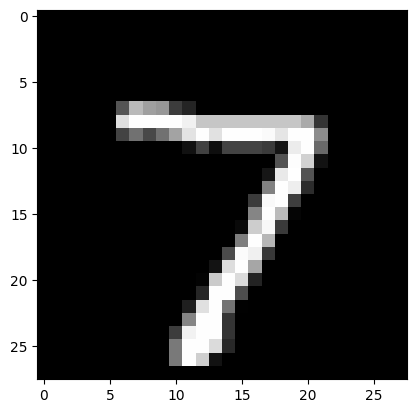

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Prediction: ', np.argmax(y_predict))